In [1]:
# Import libraries for inspecting files
import json
import pickle
import h5py
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches
from PIL import Image

In [2]:
data_location = './data/'

## Symbol dictionaries (.pkl) + (.npy)

In [3]:
# Open QA vocabulary / dictionary file
with open(data_location+'gen_gqa_objects_qaVocab.pkl', 'rb') as f:
    dat_qa = pickle.load(f)

In [4]:
print('Questions and Answers: length =', len(dat_qa.allSeqs), '\n')
print(dat_qa.allSeqs[0:8])
print(dat_qa.allSeqs[8:14])
print(dat_qa.allSeqs[14:19])
print(dat_qa.allSeqs[19:26])

Questions and Answers: length = 10652802 

['do', 'you', 'see', 'any', 'trays', 'or', 'cds', 'no']
['where', 'was', 'the', 'photo', 'taken', 'lake']
['which', 'place', 'is', 'it', 'lake']
['on', 'which', 'side', 'is', 'the', 'bike', 'right']


In [5]:
# Open Question vocabulary / dictionary file
with open(data_location+'gen_gqa_objects_questionVocab.pkl', 'rb') as f:
    dat_qst = pickle.load(f)

In [6]:
print('Questions: length =', len(dat_qst.allSeqs),'\n')
print(dat_qst.allSeqs[0:7])
print(dat_qst.allSeqs[7:12])
print(dat_qst.allSeqs[12:16])
print(dat_qst.allSeqs[16:22])

Questions: length = 9565162 

['do', 'you', 'see', 'any', 'trays', 'or', 'cds']
['where', 'was', 'the', 'photo', 'taken']
['which', 'place', 'is', 'it']
['on', 'which', 'side', 'is', 'the', 'bike']


In [7]:
# Open answers vocabulary / dictionary file
with open(data_location+'gen_gqa_objects_answerVocab.pkl', 'rb') as f:
    dat_ans = pickle.load(f)

In [8]:
print('Answers: length =', len(dat_ans.allSeqs), '\n\n',dat_ans.allSeqs[0:4])

Answers: length = 1087640 

 ['no', 'lake', 'lake', 'right']


In [9]:
# Open question embeddings dictionary
dat_emb = np.load(data_location+'gen_gqa_objects_qEmbs.npy', mmap_mode='r')


In [10]:
print('Question embeddings dictionary: shape =', dat_emb.shape,'\n')
print(dat_emb[0:5])
print('...')
print(dat_emb[295:299])

Question embeddings dictionary: shape = (2957, 300) 

[[-1.26858085 -0.68130548 -0.97519705 ...  0.05408307 -0.54395505
   0.03633041]
 [-1.33486396  0.12564387 -2.11149365 ...  0.34890055 -0.38337371
  -0.1857953 ]
 [ 0.07728242 -1.08545734 -0.43364464 ... -0.07561782 -0.75830722
  -0.13077144]
 [-2.51483456 -0.35209872 -2.58503791 ... -0.22988331  1.26591721
   0.86252253]
 [-0.0054037   0.27079    -0.45665    ... -0.49672     0.22489
   0.19173   ]]
...
[[ 0.39968  -0.59553   0.22569  ... -0.16148  -0.24262   0.48961 ]
 [-0.53851   0.23302  -0.12842  ... -0.054958 -0.017548 -0.022145]
 [-0.29422   0.23123   0.066889 ... -0.1873    0.10478  -0.04166 ]
 [-0.10623   0.30212  -0.22156  ... -0.071355 -0.40002   0.61758 ]]


## Question-answer-image data / instances (.json)

In [11]:
with open(data_location+'balanced_train_data.json') as f:
    data_bal_train = json.load(f)

In [12]:
print("Keys: %s" % data_bal_train.keys())
bal_tr_key = list(data_bal_train.keys())[0]

Keys: dict_keys(['questions'])


In [13]:
print(len(data_bal_train['questions']))

943000


In [14]:
with open(data_location+'balanced_val_data.json') as f:
    data_bal_val = json.load(f)

In [15]:
print("Keys: %s" % data_bal_val.keys())
bal_val_key = list(data_bal_val.keys())[0]

Keys: dict_keys(['questions'])


In [16]:
print(len(data_bal_val['questions']))

132062


In [17]:
print('Balanced training data:\n')
print(len(data_bal_train))
for i in range(4):
    print(data_bal_train['questions'][i],'\n')

Balanced training data:

1
{'questionId': '0045', 'group': 'existOrC', 'answer': 'no', 'type': 'logical', 'fullAnswer': 'No, there are no CDs or trays.', 'question': 'Do you see any trays or CDs?', 'imageId': '2315895'} 

{'questionId': '001', 'group': 'place', 'answer': 'lake', 'type': 'query', 'fullAnswer': 'It was taken at the lake.', 'question': 'Where was the photo taken?', 'imageId': '2315895'} 

{'questionId': '002', 'group': 'place', 'answer': 'lake', 'type': 'query', 'fullAnswer': 'It is a lake.', 'question': 'Which place is it?', 'imageId': '2315895'} 

{'questionId': '00133', 'group': 'positionQuery', 'answer': 'right', 'type': 'query', 'fullAnswer': 'The bike is on the right of the image.', 'question': 'On which side is the bike?', 'imageId': '2315897'} 



In [18]:
with open(data_location+'balanced_val_data.json') as f:
    data_bal_val = json.load(f)

In [19]:
print('Balanced validation data:\n')
for i in range(4):
    print(data_bal_val['questions'][i],'\n')

Balanced validation data:

{'questionId': '006085', 'group': 'existOr', 'answer': 'yes', 'type': 'logical', 'fullAnswer': 'Yes, there is a bag.', 'question': 'Are there either any bags or chairs?', 'imageId': '2324265'} 

{'questionId': '006149', 'group': 'relChooser', 'answer': 'right', 'type': 'choose', 'fullAnswer': 'The bag is to the right of the man.', 'question': 'Is the bag to the right or to the left of the man?', 'imageId': '2324265'} 

{'questionId': '006060', 'group': 'relVerifyCo', 'answer': 'no', 'type': 'verify', 'fullAnswer': 'No, the man wears a jacket.', 'question': 'Does the man to the left of the bag wear a helmet?', 'imageId': '2324265'} 

{'questionId': '006055', 'group': 'relO', 'answer': 'jacket', 'type': 'query', 'fullAnswer': 'The man wears a jacket.', 'question': 'What does the man to the left of the kites wear?', 'imageId': '2324265'} 



In [20]:
with open(data_location+'gen_gqa_objects_valInstances.json') as f:
    data_val_ins = json.load(f)

In [21]:
print(len(data_val_ins))

132062


In [22]:
print('Validation instances:\n')
for i in range(4):
    print(data_val_ins[i],'\n')

Validation instances:

{'questionStr': 'Is the giraffe that is not small standing next to the shrub that is not big?', 'question': ['is', 'the', 'giraffe', 'that', 'is', 'not', 'small', 'standing', 'next', 'to', 'the', 'shrub', 'that', 'is', 'not', 'big'], 'answer': 'yes', 'imageId': {'group': 'val', 'id': '2319456', 'idx': 93714}, 'tier': 'val', 'index': 90425, 'questionId': '13534717', 'objectsNum': 21, 'type': 'verify', 'group': 'relVerify'} 

{'questionStr': 'Is the shirt black or yellow?', 'question': ['is', 'the', 'shirt', 'black', 'or', 'yellow'], 'answer': 'black', 'imageId': {'group': 'val', 'id': '2342134', 'idx': 66867}, 'tier': 'val', 'index': 128227, 'questionId': '19225230', 'objectsNum': 37, 'type': 'choose', 'group': 'chooseAttr'} 

{'questionStr': 'Are there both a fork and a plate?', 'question': ['are', 'there', 'both', 'a', 'fork', 'and', 'a', 'plate'], 'answer': 'yes', 'imageId': {'group': 'val', 'id': '2367240', 'idx': 5064}, 'tier': 'val', 'index': 84935, 'questio

## Object bounding-box and features (.h5) + merged information (.json)

Object based visual features for the GQA dataset.
- objects/gqa_objects_*.h5: object-based features, using faster-RCNN, grouped into 16 chunks of up to 10,000 images each. Format: {"features": (10000 x 100 x 2048), "bboxes": (10000 x 100 x 4)}
- objects/gqa_objects_info.json: a dictionary from image ID to its properties. Format: {"<ID>": {"file": [0-15], "idx": int, "objectsNum": int, "width": int(px), "height": int(px)}}


In [23]:
# Open objects file and inspect
#file_objects = data_location+'objects/gqa_objects_0.h5'
file_objects = data_location+'gqa_objects_sg.h5'
data_obs = h5py.File(file_objects, 'r')


In [24]:
# List all groups
print("Keys: %s" % data_obs.keys())
obs_key = list(data_obs.keys())[0]


Keys: <KeysViewHDF5 ['bboxes', 'features']>


In [25]:
# Get shape and visualise bounding boxes
print('Objects (bounding boxes): shape =', data_obs['bboxes'].shape, '\n\n', data_obs['bboxes'][7][0:40])

Objects (bounding boxes): shape = (85638, 100, 4) 

 [[133. 179. 141. 190.]
 [234. 190. 245. 214.]
 [227.  76. 257. 115.]
 [222.  71. 259.  93.]
 [233.  89. 256. 113.]
 [  1.   1. 498. 331.]
 [134.  41. 259. 213.]
 [114. 148. 158. 207.]
 [237. 185. 247. 193.]
 [178. 128. 237. 182.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]]


In [26]:
# Get shape and visualise features
print('Objects (features): shape =', data_obs['features'].shape, '\n\n', data_obs['features'][7])

Objects (features): shape = (85638, 100, 200) 

 [[-0.36246     0.80723    -0.1154     ... -0.16022712  0.06672163
  -0.5969475 ]
 [ 0.088068   -0.42703     0.21275    ... -0.30620837 -0.10374413
  -0.60476337]
 [-0.28054     0.30915    -0.20189    ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [27]:
with open(data_location+'gqa_objects_sg_merged_info.json') as f:
    data_obs_mi = json.load(f)

In [28]:
print(len(data_obs_mi))

85638


In [29]:
print(data_obs_mi['1'])

{'width': 800, 'objectsNum': 26, 'height': 600, 'index': 52681}


In [30]:
print('Objects Merged Info:\n')
for i in range(1,9):
    si = str(i)
    print(' ',si,':', data_obs_mi[si])

Objects Merged Info:

  1 : {'width': 800, 'objectsNum': 26, 'height': 600, 'index': 52681}
  2 : {'width': 800, 'objectsNum': 23, 'height': 600, 'index': 20122}
  3 : {'width': 640, 'objectsNum': 22, 'height': 480, 'index': 62517}
  4 : {'width': 640, 'objectsNum': 18, 'height': 480, 'index': 29788}
  5 : {'width': 800, 'objectsNum': 23, 'height': 600, 'index': 72538}
  6 : {'width': 800, 'objectsNum': 22, 'height': 600, 'index': 39666}
  7 : {'width': 800, 'objectsNum': 34, 'height': 600, 'index': 7196}


KeyError: '8'

In [31]:
with open(data_location+'gqa_spatial_merged_info.json') as f:
    data_spat_mi = json.load(f)

print(len(data_spat_mi))

148854


In [32]:
print(data_spat_mi['2342134'])

{'index': 35609}


In [33]:
si_lookup = 0


si_ct = 0
si_find = None
si_max = 999999
for si in data_obs_mi:
    dat = data_obs_mi[si]['index']
    
    if dat==si_lookup:
        si_find = si
    
    si_ct += 1
    if si_ct > si_max:
        break

if si_find != None:
    print('Found for image:',si_find)
else:
    print('Not found')

print(data_obs_mi[si_find])


Found for image: 2386621
{'width': 500, 'objectsNum': 16, 'height': 375, 'index': 0}


## Visualise Object bounding-boxes on example

In [34]:
# Pick image from last validation instance and get corresponding reference in object list
print(data_obs_mi['2406136'])
print(data_obs_mi['1'])


{'width': 500, 'objectsNum': 13, 'height': 338, 'index': 78196}
{'width': 800, 'objectsNum': 26, 'height': 600, 'index': 52681}


In [35]:
# Determine the bounding box details
bboxes = data_obs['bboxes'][78196][0:21]
print(bboxes)

[[ 72.  35. 435. 338.]
 [292. 163. 336. 248.]
 [  3.   6. 500. 336.]
 [186. 151. 271. 215.]
 [300. 168. 412. 304.]
 [152.  43. 333. 168.]
 [268. 111. 293. 125.]
 [122. 222. 175. 237.]
 [292. 187. 362. 207.]
 [223. 118. 260. 151.]
 [239. 141. 253. 146.]
 [  3. 197. 193. 240.]
 [160. 262. 325. 336.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]]


In [36]:
def get_bb(bboxes, i):
    x = np.round(bboxes[i,0],0)
    y = np.round(bboxes[i,1],0)
    xy = (x,y)
    width = np.round(bboxes[i,2]-x,0)
    height = np.round(bboxes[i,3]-y,0)
    return xy, width, height

print(get_bb(bboxes,1))

((292.0, 163.0), 44.0, 85.0)


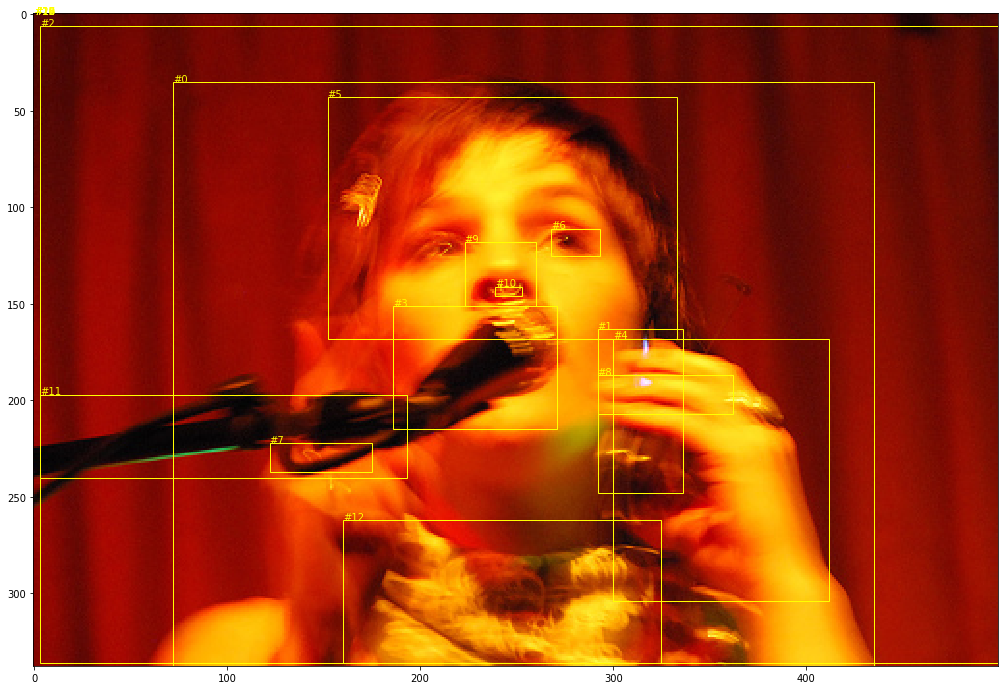

In [37]:
plt.figure(figsize=(20,12))
# Create figure and axes

img_ex = cv2.imread(data_location + 'images/2406136.jpg')
img_ex = cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB)
plt.imshow(img_ex)
for i in range(21):
    xy, width, height = get_bb(bboxes,i)
    rect = patches.Rectangle(xy, width, height,linewidth=1,edgecolor='yellow',facecolor='none')
    plt.gca().add_patch(rect)
    plt.annotate("#"+str(i),xy,color='yellow')

plt.show()

## Image spatial features (.h5) + merged information (.json)

Spatial visual features for the GQA dataset.
- spatial/gqa_spatial_*.h5: spatial features, using Resnet-101, grouped into 16 chunks of up to 10,000 images each. Format: {"features": (10000 x 2048 x 7 x 7)}
- spatial/gqa_spatial_info.json: a dictionary from image ID to its properties (fileId and row index). Format: {"<ID>": {"file": [0-15], "idx": int}}

In [38]:
# Open spatial file and inspect
file_spatial = data_location+'/gqa_spatial.h5'
data_spat = h5py.File(file_spatial, 'r')


In [39]:
# List all groups
print("Keys: %s" % data_spat.keys())
spat_key = list(data_spat.keys())[0]


Keys: <KeysViewHDF5 ['features']>


In [40]:
# Get shape and visualise features
print('Spatial (features): shape =',data_spat['features'].shape, '\n\n', data_spat['features'][7][0])

Spatial (features): shape = (148855, 2048, 7, 7) 

 [[0.25336385 0.         0.         0.         0.         0.
  0.        ]
 [0.08742898 0.07958186 0.09106399 0.18255338 0.         0.04785626
  0.08983138]
 [0.32976782 0.96055865 1.4865386  0.96269864 0.72221935 0.6962018
  0.1975905 ]
 [0.50118977 1.0958952  2.5416887  2.4205055  1.412374   0.799222
  0.06978896]
 [0.7595927  0.99867857 2.9721532  1.9321383  1.1486123  1.4199538
  0.75956273]
 [0.         0.8807232  0.6926838  0.42064258 0.4402609  0.9651278
  0.9133452 ]
 [0.         0.         0.         0.         0.6172155  0.27684596
  0.29107052]]


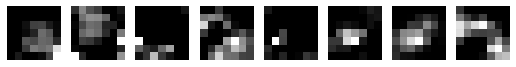

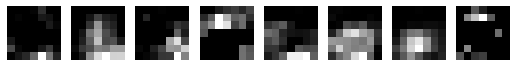

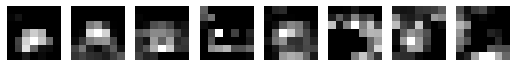

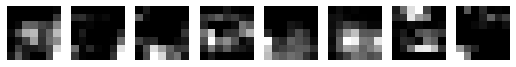

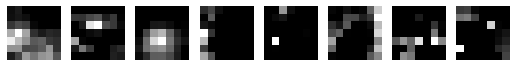

In [41]:
# Visualise ResNet output features for example (image 7)

for j in range(5):
    plt.figure(figsize=(9,2))
    for i in range(9):
        img = data_spat['features'][7][j*9+i]
        img_max = np.max(img)
        img_min = np.min(img)
        img = (img - img_min) / (img_max - img_min) * 256
        
        plt.subplot('18'+str(i))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()
        

In [42]:
with open(data_location+'gqa_spatial_merged_info.json') as f:
    data_spat_mi = json.load(f)

In [43]:
print('Spatial Merged Info:\n')
for i in range(1,9):
    si = str(i)
    print(' ',si,':', data_spat_mi[si])

Spatial Merged Info:

  1 : {'index': 0}
  2 : {'index': 1}
  3 : {'index': 2}
  4 : {'index': 3}
  5 : {'index': 4}
  6 : {'index': 5}
  7 : {'index': 6}
  8 : {'index': 7}


In [44]:
print(data_spat_mi['2342134'])
print(data_spat_mi['10001'])

{'index': 35609}


KeyError: '10001'

## Scene graphs (.json)

Scene graphs for the GQA dataset, for train and valiadation sets. 
Each image is associated with a scene graph the provides information about the objects, attributes and relations in the image.

In [ ]:
with open('./sceneGraphs/val_sceneGraphs.json') as f:
    data_val_scenegraphs = json.load(f)

In [ ]:
print(len(data_val_scenegraphs))

In [ ]:
print('Scene Graph Info (validation):\n')
print(' ',2353884,':', data_val_scenegraphs['2353884'], '\n\n')
print(' ',2410049,':', data_val_scenegraphs['2410049'])